

---



## **1. 협업 필터링**

협업 필터링은 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 방식을 의미합니다.  

<br>

협업 필터링의 주요 목표는 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로, 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것입니다. 

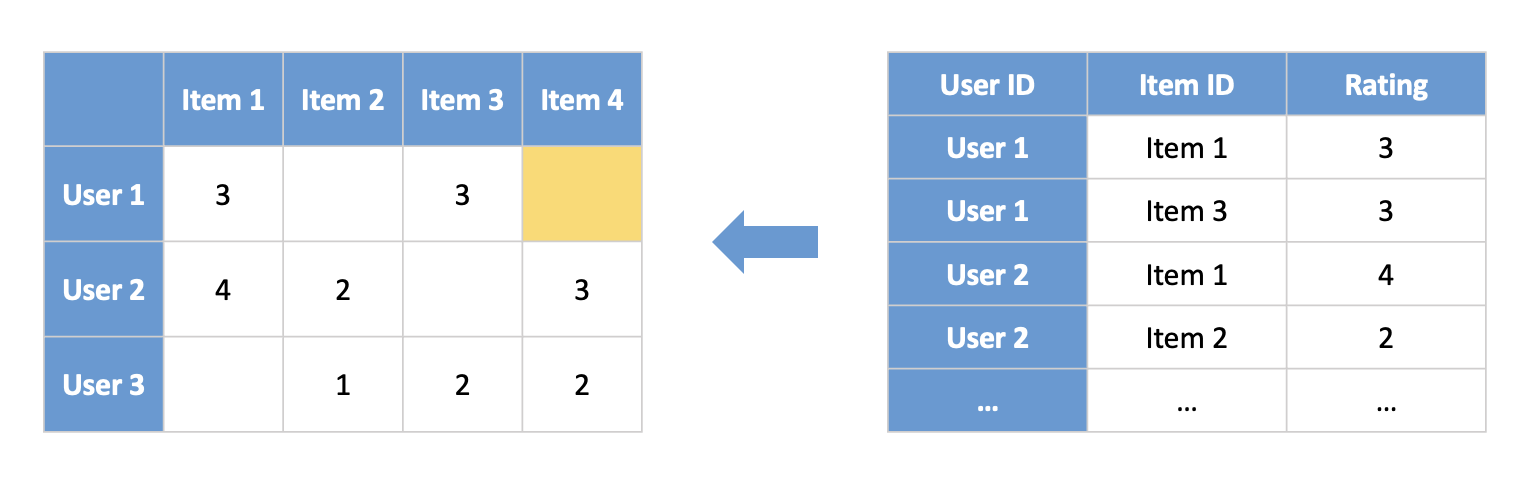

예를 들어, 왼쪽 표처럼 사용자 1이 item 1과 item 3에 각 3점을 부여했다면, item 4에는 몇 점을 부여할 것인지를 예측하는 것입니다.  

일반적인 데이터프레임은 오른쪽 표처럼 각 사용자가 아이템 별로 평점을 어떻게 매겼는지에 대한 정보를 담고 있습니다. 이를 pivot화하여 왼쪽 표처럼 바꿔주는 과정이 필요합니다.

<br>

### **1) 최근접 이웃 협업 필터링**

최근접 이웃 협업 필터링(=메모리 협업 필터링)은 다시 두 가지 방식으로 분류됩니다.  

1. 사용자 기반(User-User): 당신과 비슷한 고객들이 다음 상품도 구매했습니다.  
2. 아이템 기반(Item-Item): 이 상품을 구매한 고객들은 다음 상품도 구매했습니다.

<br>

#### **i) 사용자 기반**

사용자 기반 최근접 이웃 방식은 **특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 해당 사용자가 좋아하는 아이템을 추천하는 방식**입니다. 이때, TOP-N 사용자는 특정 사용자와 타 사용자 간의 유사도를 측정했을 때 가장 유사도가 높은 사용자를 의미합니다.  
<br>
아래 그림은 사용자별 영화 평점 정보를 나타냅니다.

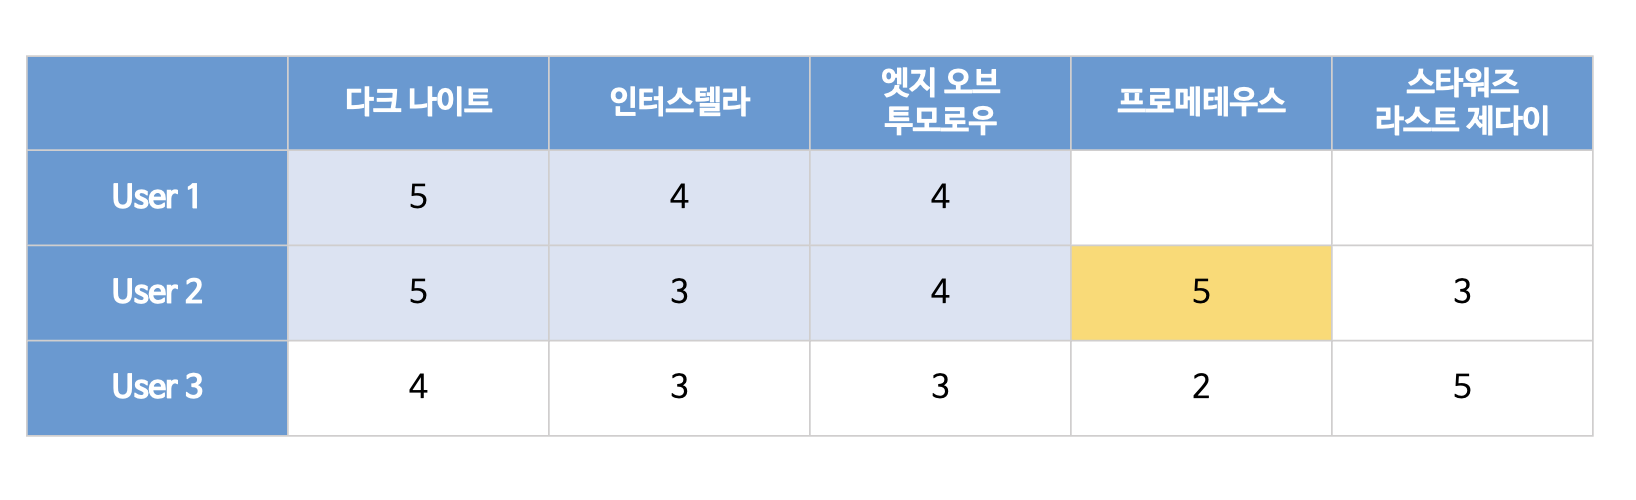

User 1를 기준으로 보았을 때 User 3보다는 User 2가 영화 평점 측면에서 높은 유사도를 보입니다.  
따라서 User 2가 재미있게 본 <*프로메테우스*>를 User 1에게 추천해줄 수 있습니다.

<br>

#### **ii) 아이템 기반**

아이템 기반 최근접 이웃 방식은 사용자들이 그 아이템을 좋아하는지/싫어하는지 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘입니다.  이름 때문에 오해하기 쉽지만 **아이템이 가지는 속성의 유사도로 판단하는 것이 아닙니다.**

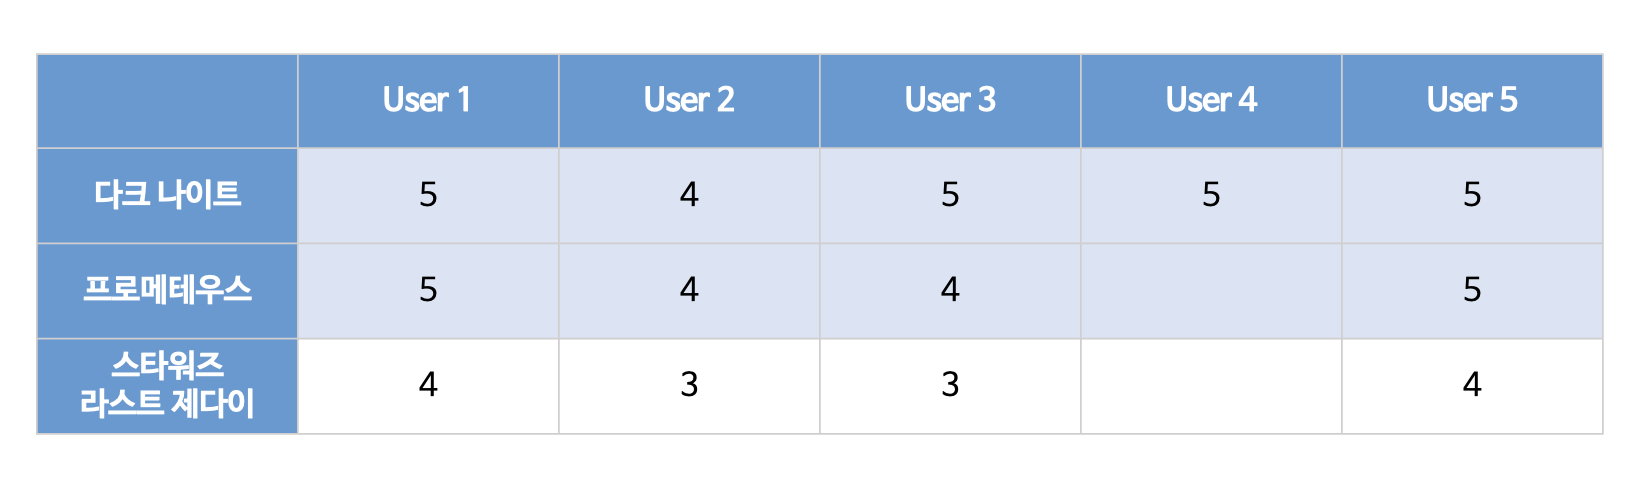

평점 분포 기준으로 보았을 때, 아이템 <*다크 나이트*>는 <*스타워즈 라스트 제다이*>보다 <*프로메테우스*>와 더 유사합니다.  
따라서 <*다크 나이트*>를 매우 좋아하는 사용자 D에게는 <*프로메테우스*>와 <*스타워즈-라스트 제다이*> 중 <*프로메테우스*>를 추천하게 됩니다.

일반적으로 사용자 기반보다는 아이템 기반 협업 필터링의 정확도가 더 높습니다. 유사한 상품을 구매한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문입니다.

<br>

### **2) 잠재 요인 협업 필터링**

#### **i) 작동 원리**

<br>

잠재요인 협업 필터링은 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법입니다.

<br>
<br>

대규모 다차원 행렬을 차원 감소 기법으로 분해하며 잠재 요인을 추출하는데, 이러한 기법을 행렬분해라고 합니다. 

다차원 희소 행렬인 사용자-아이템 행렬 데이터를 1) 저차원 밀집 행렬의 사용자-잠재요인 행렬 데이터로 만들어서 2) **사용자가 아직 평점을 부여하지 않은 데이터에 대한 예측 평점을 생성하는 것**이 잠재요인 협업 필터링 알고리즘의 핵심입니다.

<br>

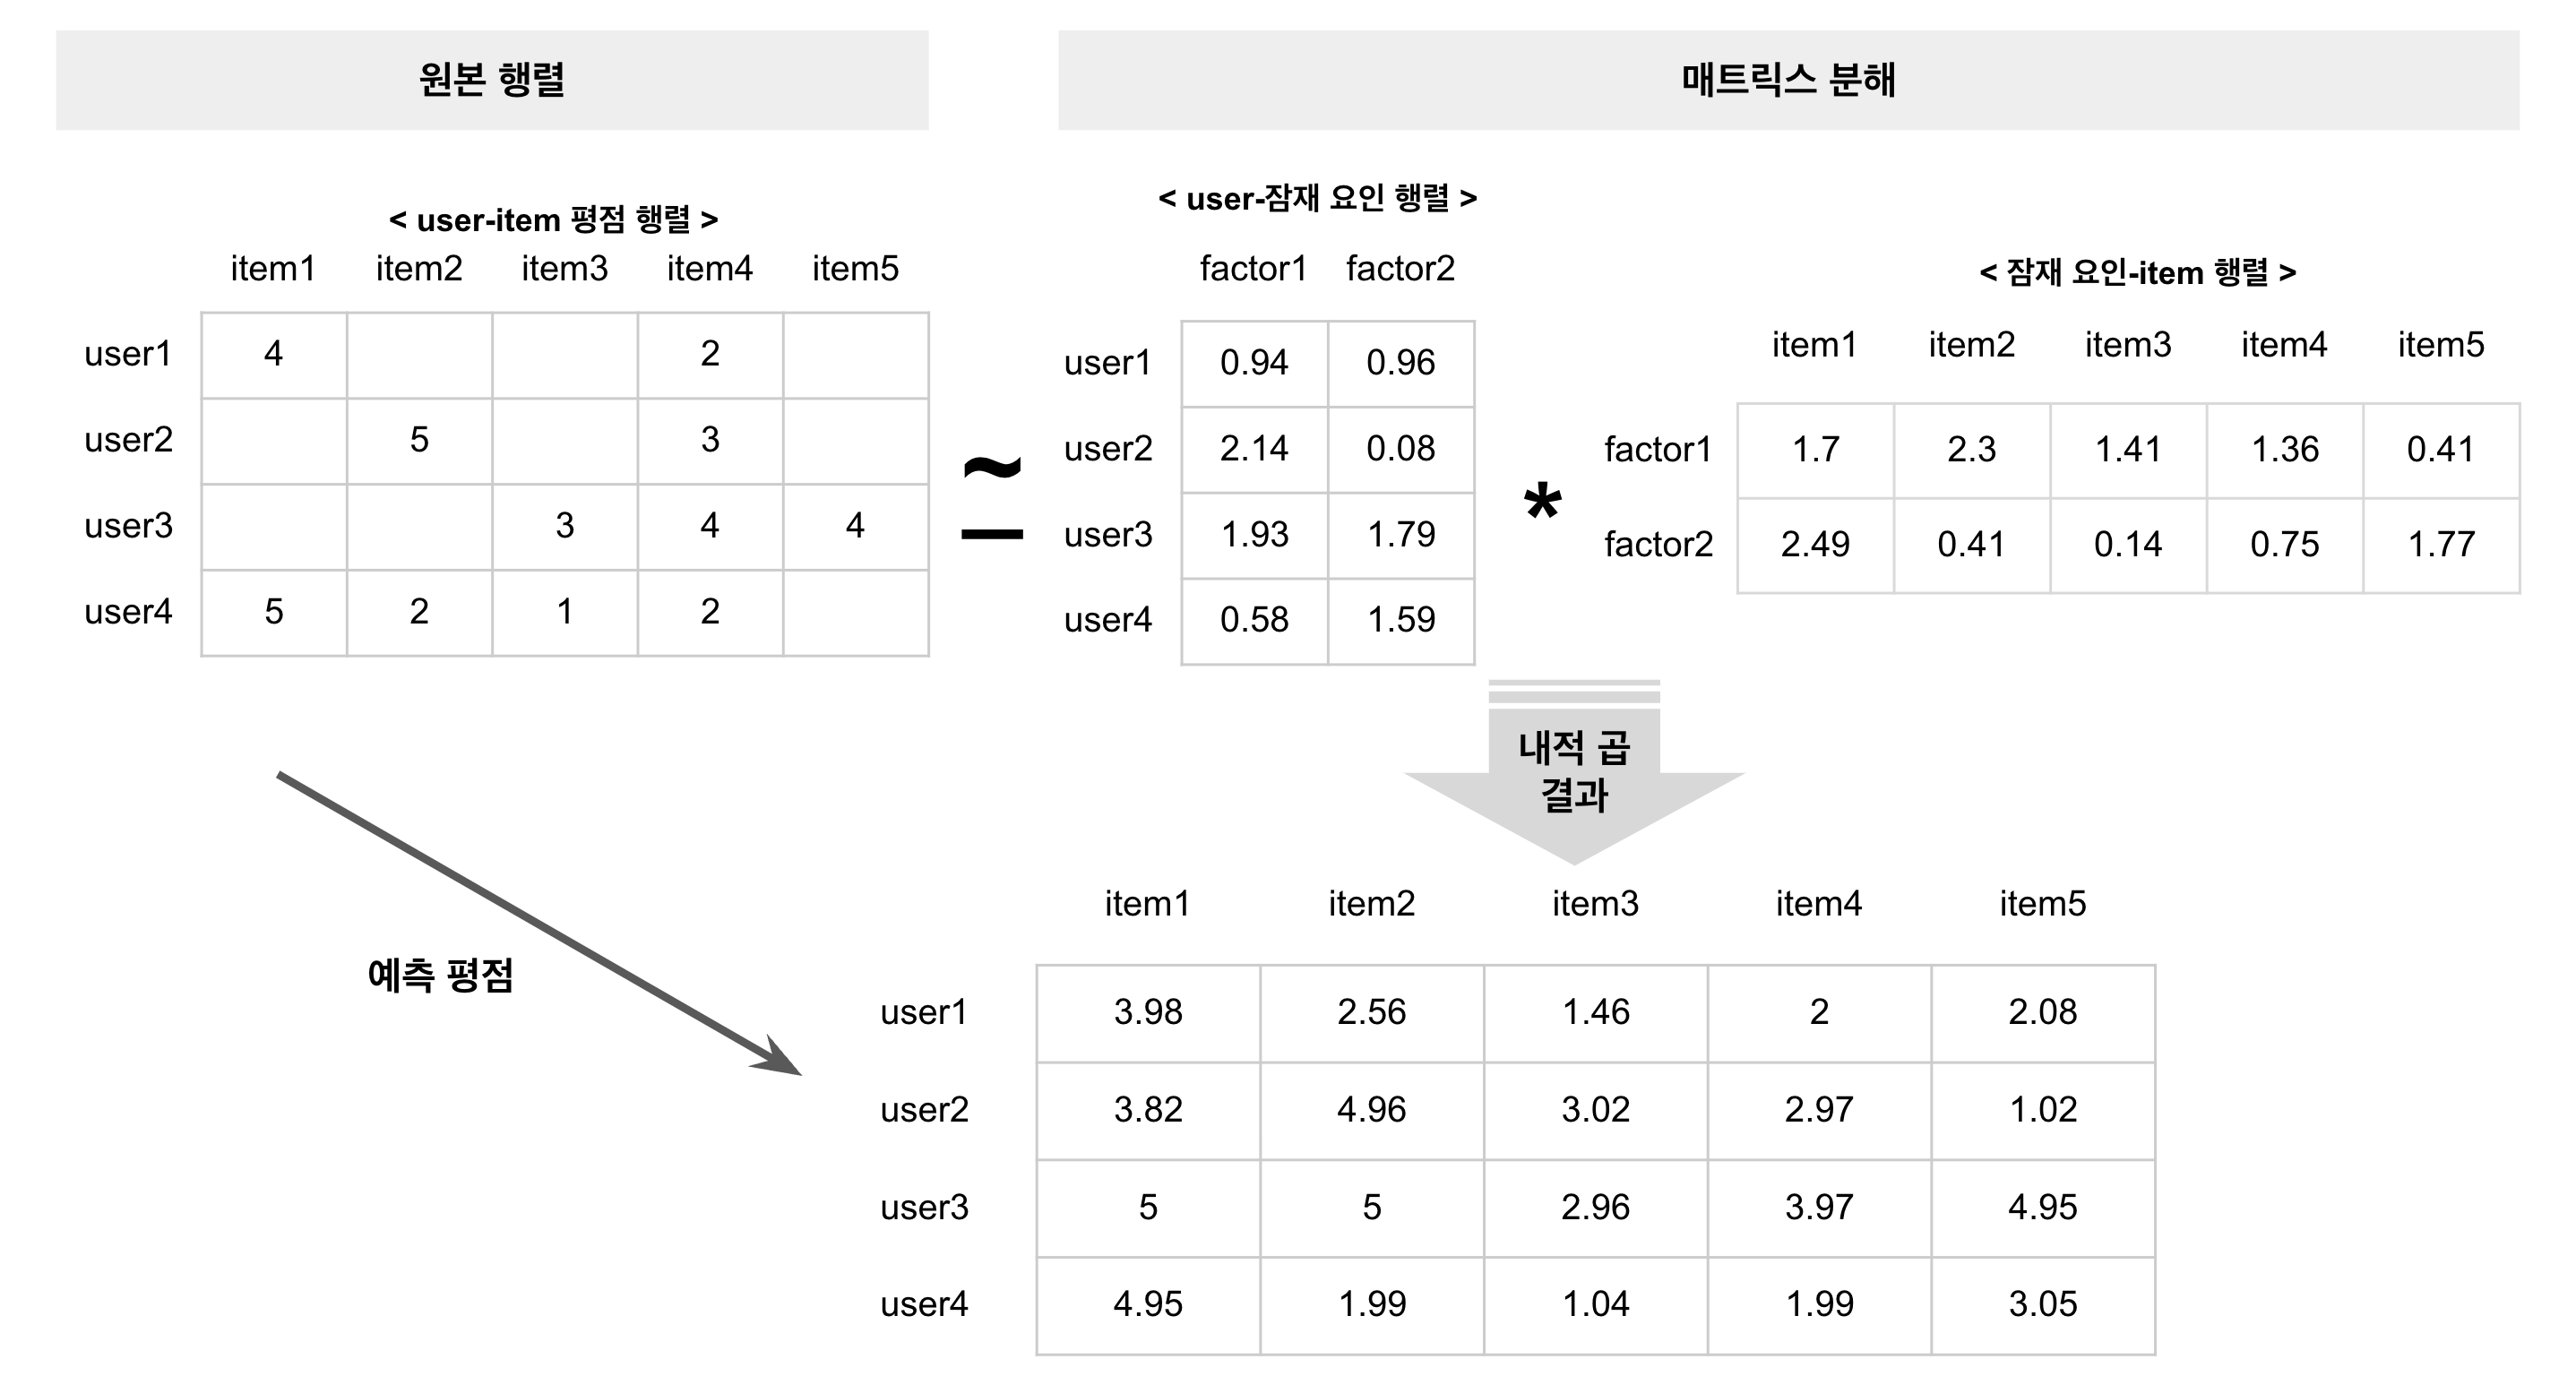

<br>

조금 더 자세히 설명을 해보겠습니다.

행렬 분해에 의해 추출되는 '잠재 요인'이 정확히 어떤 것인지는 알 수 없지만,
- 1) user-item 평점 행렬 >> 사용자의 영화 평점 정보
- 2) user-잠재 요인 행렬 >> 사용자-장르 선호도
- 3) 잠재 요인-item 행렬 >> 영화-장르별 특성값 
이라고 가정해보겠습니다.

<br>
<br>

평점이란 사용자의 특정 영화 장르에 대한 선호도와 개별 영화의 그 장르적 특성값을 반영해 결정됩니다. 예를 들어, 사용자가 로맨스 영화를 매우 좋아하고, 어떤 한 영화가 로맨스 영화의 특징을 많이 보인다면 그 사용자는 해당 영화에 높은 평점을 줄 확률이 높을 것입니다.

이에 따라 예측 평점은 **사용자-장르 선호도와 영화-장르별 특성값의 내적 곱**으로 구해집니다.

<br>

#### **ii) SGD를 이용한 행렬분해**

행렬 분해의 대표적인 기법으로는 SVD(Singluar Vector Decomposition), NMF(Non-Negative Matrix Factorization) 등이 있습니다. 또한 확률적 경사 하강법(Stochastic Gradient Descent)을 이용하여 잠재 요인 행렬을 추출하면, 실제 값과 최소의 오류를 가지는 행렬 분해를 할 수 있습니다.

<br>

확률적 경사 하강법을 이용한 행렬 분해의 전반적인 과정은 다음과 같습니다.
<br>
<br>

- 1. user-잠재 요인 행렬과 잠재 요인-item 행렬을 임의의 값으로 설정
- 2. 내적 곱을 통해 예측 행렬을 계산하고 예측 행렬과 실제 행렬의 오류값을 계산
- 3. 오류 값을 최소화 할 수 있게 잠재요인 행렬 업데이트
- 4. 만족할 만한 오류 값을 가질 때 까지 2~3번을 반복하면서 근사화

<br> 

실습에서는 **확률적 경사 하강법을 이용하여 실제 값과의 오류를 줄인 SGD 행렬분해를 이용하여 예측 평점을 산출해보겠습니다.**

## **2. 실습**

<br>

### **1) 아이템 기반 최근접 이웃 협업 필터링 실습**

<br>

Grouplens에서는 Movielens 데이터셋을 제공하고 있습니다. 

[Grouplens](https://grouplens.org/datasets/movielens/latest/)에 방문하시면 해당 데이터셋을 다운로드하실 수 있습니다.

<br>

#### **[라이브러리 임포트]**

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

<br>

#### **[데이터 불러오기]**

In [2]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


<br>

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<br>

#### **i) pivot 데이터프레임 생성**

<br>

앞서 데이터프레임을 pivot하여 사용자를 행, 영화를 열로 구성한 데이터프레임으로 변경해야 한다고 했습니다. 따라서 pivot_table을 적용하여 데이터프레임을 변환하겠습니다.

In [5]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ratings에 있는 사용자 id와 영화 id, 평점을 이용해 데이터프레임을 생성했습니다.

<br>

ratings와 movies 데이터프레임을 movieId를 기준으로 조인해 줍니다.  

생성된 title 열을 기준으로 pivot을 수행하면 다음과 같은 결과를 얻을 수 있습니다.


In [6]:
# title 컬럼을 얻기 위해 movies 와 조인 수행
rating_movies = pd.merge(ratings, movies, on='movieId')

# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br>

#### **ii) 영화 간 유사도 산출**

<br>

ratings_matrix 데이터프레임은 각 행에 사용자 정보가, 열에 영화 평점에 담겨 있습니다.   

cosine 유사도는 행을 기준으로 서로 다른 행을 비교하여 산출하므로 이 상태로 cosine 유사도를 구하면 사용자 간 유사도가 측정되게 됩니다.   

따라서 행, 열을 바꿔주는 작업이 필요한데 아래처럼 transpose() 함수를 사용하여 행,열을 바꿀 수 있습니다.

<br>

In [7]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(ratings_matrix.shape)
print(ratings_matrix_T.shape)

(610, 9719)
(9719, 610)


행, 열이 잘 바뀐 것을 확인할 수 있습니다.

<br>

이제 영화 간 유사도를 산출해 보겠습니다.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)


(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


<br>

<*Godfater, The (1972)*>를 기준으로 상위 유사도 6개 영화를 뽑았습니다.

In [10]:
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

<br>

<*Inception (2010)*>를 기준으로 상위 유사도 6개 영화를 뽑았습니다.

In [11]:
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

<br>

#### **iii) 영화 추천**

<br>

개인화된 영화 추천의 가장 큰 특징은 아직 관람하지 않은 영화를 추천한다는 것입니다.  

따라서, 아이템 유사도와 기존에 관람한 영화의 평점 데이터를 기반으로 새롭게 모든 영화의 예측 평점을 계산한 후 높은 예측 평점을 가진 영화를 추천해야 합니다.

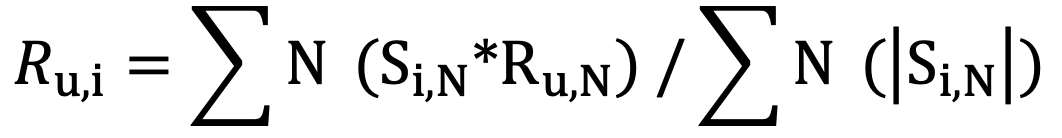

<br>  

> - R(u,i): 사용자 u, 아이템 i의 개인화된 예측 평점 값 
- S(i,N): 아이템 i와 가장 유사도가 높은 TOP-N개 아이템의 유사도 벡터
- R(u,N): 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터  

<br>

이를 구현한 predict_rating 함수를 정의합니다.

In [12]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred


<br>

In [13]:
ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
print(ratings_pred_matrix.shape)
ratings_pred_matrix.head(3)

(610, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


예측 평점을 이용한 데이터프레임이 생성되었습니다. 

<br>

예측 평가 지표인 MSE를 계산하는 get_mse() 함수를 만들고 결과를 확인하겠습니다.

In [14]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


<br>

이제 TOP-N 유사도를 가진 데이터들에 대해서만 예측 평점을 계산하고 결과를 확인해 보겠습니다.

In [15]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred


In [16]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)


아이템 기반 인접 TOP-20 이웃 MSE:  3.6949999176225483


기존의 9.89보다 상당히 향상된 예측 성능을 보입니다.

<br>

9번 user_id를 가진 사용자가 어떤 영화를 좋아하는지 높은 평점 순으로 나열해 보겠습니다.

In [17]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

<br>

영화 추천을 위해, 이미 평점을 매긴 영화는 제외하고 새로운 영화 중에서 추천할 수 있도록 get_unseen_movies() 함수를 생성하겠습니다. 

In [18]:
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듦
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듦. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list


<br>

아이템 기반 유사도로 평점이 부여된 데이터셋에서 해단 사용자가 관람하지 않은 영화들 중 예측 평점이 높은 순으로 추천해 보겠습니다. 

In [19]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies
    
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies


,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


<*Shrek*>, <*Spider-Man*>, <*Matrix*> 등 흥행을 기록한 다양한 영화들이 추천되었습니다. 

---

지금까지 협업 필터링 추천 시스템에 대해 알아보았습니다.


<BR>


<br>

### **2) 잠재 요인 협업 필터링 실습**

<br>

#### **i) 함수 생성**

<br>

확률적 경사하강법에서 오차값을 보기 위해 rmse 계산 함수를 생성합니다.

In [20]:
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

확률적 경사하강법을 이용한 행렬 분해를 위한 함수를 만듭니다. 해당 함수에서는 파라미터 값을 아래와 같이 설정했습니다.

- steps = 200 (반복횟수)
- learning_rate = 0.01 (SGD 학습률)
- r_lambda = 0.01 (L2 Regularization 계수)

In [21]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

이제 위에서 만든 행렬분해 함수를 이용하여 데이터를 학습시키고 예측 평점과 실제 평점에 대한 오차를 살펴보겠습니다.

In [22]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  2.9023619751336867
### iteration step :  10  rmse :  0.7335768591017927
### iteration step :  20  rmse :  0.5115539026853442
### iteration step :  30  rmse :  0.37261628282537446
### iteration step :  40  rmse :  0.29608182991810134
### iteration step :  50  rmse :  0.2520353192341642
### iteration step :  60  rmse :  0.2248750327526985
### iteration step :  70  rmse :  0.20685455302331537
### iteration step :  80  rmse :  0.19413418783028683
### iteration step :  90  rmse :  0.184700820027204
### iteration step :  100  rmse :  0.17742927527209104
### iteration step :  110  rmse :  0.1716522696470749
### iteration step :  120  rmse :  0.1669518194687172
### iteration step :  130  rmse :  0.1630529219199754
### iteration step :  140  rmse :  0.1597669192967964
### iteration step :  150  rmse :  0.15695986999457318
### iteration step :  160  rmse :  0.15453398186715428
### iteration step :  170  rmse :  0.1524161855107764
### iteration step :  180  rmse :

학습이 거듭될수록 rmse의 값이 감소하는 것을 알 수 있습니다.

<br>

#### **ii) 예측 평점 출력**

<br>

학습시킨 데이터를 기반으로 예측 평점 데이터 프레임을 생성하고 head를 통해 3개의 행만 추출하여 확인해봅니다.

In [23]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.055084,4.092018,3.564130,4.502167,3.981215,1.271694,3.603274,2.333266,5.091749,3.972454,...,1.402608,4.208382,3.705957,2.720514,2.787331,3.475076,3.253458,2.161087,4.010495,0.859474
2,3.170119,3.657992,3.308707,4.166521,4.311890,1.275469,4.237972,1.900366,3.392859,3.647421,...,0.973811,3.528264,3.361532,2.672535,2.404456,4.232789,2.911602,1.634576,4.135735,0.725684
3,2.307073,1.658853,1.443538,2.208859,2.229486,0.780760,1.997043,0.924908,2.970700,2.551446,...,0.520354,1.709494,2.281596,1.782833,1.635173,1.323276,2.887580,1.042618,2.293890,0.396941


<br>

#### **iii) 영화 추천**

<br>

앞서 아이템 기반 최근접 이웃 협업 필터링에서 만들었던 함수를 이용하여 user id가 9번인 사람에게 영화를 추천해보겠습니다.

In [24]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Rear Window (1954),5.704612
"South Park: Bigger, Longer and Uncut (1999)",5.451100
Rounders (1998),5.298393
Blade Runner (1982),5.244951
Roger & Me (1989),5.191962
Gattaca (1997),5.183179
Ben-Hur (1959),5.130463
Rosencrantz and Guildenstern Are Dead (1990),5.087375
"Big Lebowski, The (1998)",5.038690


9번 사람이 보지 않은 영화 중에서 예측 평점이 가장 높은 영화 10개를 위와 같이 추천할 수 있습니다.

----------------